In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#basics
import sys,os

#utils
import paths

#main libraries
import pandas as pd

#model Libraries
from sklearn import utils
from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GroupKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [3]:
#private modules 
#data
from src.data import make_dataset

#utils
from src.utils import memory_usage

#model
from src.models import train_model
from src.models import evaluation

In [4]:
%%time
df_training,features,target = make_dataset.get_data(nrows=5000, low_memory=False, dataset="training")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 314 entries, id to target_kazutsugi
dtypes: float64(311), int32(1), object(2)
memory usage: 12.0+ MB
None
CPU times: user 898 ms, sys: 495 ms, total: 1.39 s
Wall time: 2min 36s


In [5]:
%%time
#df_tournament,features,target = make_dataset.get_data(nrows=5000, low_memory=False, dataset="tournament")

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 13.1 µs


In [6]:
memory_usage.memory()

Available memory (%): 24.47061538696289


In [7]:
results, res_cv = list(), dict()

In [8]:
rf_param_grid =  {
    'rf__n_estimators' : [10],
}


#encoding target to multiclass
lab_enc = preprocessing.LabelEncoder()
encoded_target_train = lab_enc.fit_transform(df_training[target])


#Group K-fold
CV = GroupKFold(n_splits = 3)
grp = list(CV.split(X = df_training[features], y = df_training[target],  groups = df_training.era.values))


#scorer function
scorer = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)

result = evaluation.evaluate_model(df_training[features], encoded_target_train,
                                   RandomForestClassifier(), 'rf',
                                   rf_param_grid, 
                                   scorer, 
                                   n_iter=1, 
                                   cv_folds=grp,
                                   pipeline=None)

results.append(result)
res_cv[result[1]] = evaluation.get_cv_scores(result[0])

==> Starting K-fold cross validation for rf model, 5000 examples
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.5s finished


==> Elapsed seconds: 4.973
Best rf model: RandomForestClassifier(n_estimators=10)
Best rf score (val): 0.540


In [9]:
rf_param_grid =  {
    #'rf__bootstrap' : [True, False],
    #'rf__ccp_alpha' : 0.0, 
    #'rf__class_weight': [None, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}, 'balanced'],
    #'rf__criterion' : 'gini', 
    #'rf__max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 
    #'rf__max_features' : ['auto', 'sqrt'],
    #'rf__max_leaf_nodes' : None,
    #'rf__max_samples' : None,
    #'rf__min_impurity_decrease' : 0.0, 
    #'rf__min_impurity_split' : None,
    #'rf__min_samples_leaf' : [1, 2, 4],
    #'rf__min_samples_split' : [2, 5, 10],
    #'rf__min_weight_fraction_leaf' : 0.0, 
    'regrf__n_estimators' : [10, 20],#, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    #'rf__oob_score' : False, 
    #'rf__random_state' : None,
    #'rf__verbose' : 0, 
    #'rf__warm_start' : False
}


scorer = make_scorer(mean_squared_error)

result = evaluation.evaluate_model(df_training[features], encoded_target_train,
                                   RandomForestRegressor(), 'regrf',
                                   rf_param_grid, 
                                   scorer, n_iter=2, 
                                   cv_folds=grp, pipeline=None)

results.append(result)
res_cv[result[1]] = evaluation.get_cv_scores(result[0])

==> Starting K-fold cross validation for regrf model, 5000 examples
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    9.0s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   17.5s finished


==> Elapsed seconds: 22.196
Best regrf model: RandomForestRegressor(n_estimators=10)
Best regrf score (val): 2.244


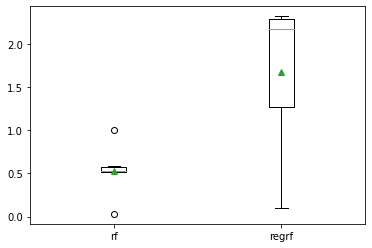

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.boxplot(res_cv.values(), labels=res_cv.keys(), showmeans=True)

In [11]:
#salvando o pipeline completo
file_path = '../../models/rf-baseline-pipeline.pkl'

model = list(filter(lambda x: x[1] == 'rf', results))[0][0]
model.save(file_path)

In [12]:
#salvando apenas o modelo
from joblib import dump, load
dump(model.model, '../../models/rf-baseline.pkl')

['../../models/rf-baseline.pkl']

In [13]:
#carregando o modelo
model_loaded = load(file_path)

### 2a parte validacao e metricas

In [14]:
#### ALL ABOUT eras Validacao e metricas

Rascunho

In [15]:
%%time
#from joblib import parallel_backend

#with parallel_backend('threading', n_jobs=-1):
    # Train the model
    #model = RandomForestClassifier(n_estimators=10, n_jobs=-1)
    #model.fit(df_training[features], encoded_target_train)
    # Test the model
    #y_pred = clf.predict(X_test)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs
